2024-07-25 15:54:49,132 - rubix - INFO - Getting rubix data...
2024-07-25 15:54:49,133 - rubix - INFO - Rubix galaxy file already exists, skipping conversion


2024-07-25 15:54:49,602 - rubix - WARNING - The Subset value is set in config. Using only subset of size 10000
2024-07-25 15:54:49,603 - rubix - INFO - Data loaded with 10000 particles.
2024-07-25 15:54:49,603 - rubix - DEBUG - Data Shape: {'coords': (10000, 3), 'velocities': (10000, 3), 'metallicity': (10000,), 'mass': (10000,), 'age': (10000,), 'halfmassrad_stars': ()}
2024-07-25 15:54:49,604 - rubix - INFO - Setting up the pipeline...
2024-07-25 15:54:49,604 - rubix - DEBUG - Pipeline Configuration: {'Transformers': {'rotate_galaxy': {'name': 'rotate_galaxy', 'depends_on': None, 'args': [], 'kwargs': {'type': 'face-on'}}, 'filter_particles': {'name': 'filter_particles', 'depends_on': 'rotate_galaxy', 'args': [], 'kwargs': {}}, 'spaxel_assignment': {'name': 'spaxel_assignment', 'depends_on': 'filter_particles', 'args': [], 'kwargs': {}}, 'reshape_data': {'name': 'reshape_data', 'depends_on': 'spaxel_assignment', 'args': [], 'kwargs': {}}, 'calculate_spectra': {'name': 'calculate_spec

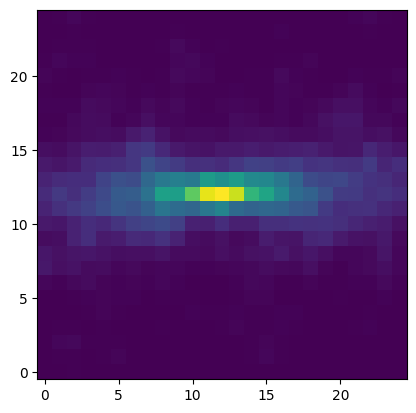

In [5]:
#NBVAL_SKIP
import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 14,
        "reuse": True,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 10000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-14.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
    },        
}

pipe = RubixPipeline(config)

data= pipe.run()

datacube = data["datacube"]
img = datacube.sum(axis=2)
plt.imshow(img, origin="lower")

/home/annalena/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2024-07-25 15:58:36,285 - rubix - INFO - Getting rubix data...
2024-07-25 15:58:36,286 - rubix - INFO - Rubix galaxy file already exists, skipping conversion


2024-07-25 15:58:36,761 - rubix - WARNING - The Subset value is set in config. Using only subset of size 10000
2024-07-25 15:58:36,761 - rubix - INFO - Data loaded with 10000 particles.
2024-07-25 15:58:36,762 - rubix - DEBUG - Data Shape: {'coords': (10000, 3), 'velocities': (10000, 3), 'metallicity': (10000,), 'mass': (10000,), 'age': (10000,), 'halfmassrad_stars': ()}
2024-07-25 15:58:36,783 - rubix - INFO - Setting up the pipeline...
2024-07-25 15:58:36,784 - rubix - DEBUG - Pipeline Configuration: {'Transformers': {'rotate_galaxy': {'name': 'rotate_galaxy', 'depends_on': None, 'args': [], 'kwargs': {'type': 'face-on'}}, 'filter_particles': {'name': 'filter_particles', 'depends_on': 'rotate_galaxy', 'args': [], 'kwargs': {}}, 'spaxel_assignment': {'name': 'spaxel_assignment', 'depends_on': 'filter_particles', 'args': [], 'kwargs': {}}, 'reshape_data': {'name': 'reshape_data', 'depends_on': 'spaxel_assignment', 'args': [], 'kwargs': {}}, 'calculate_spectra': {'name': 'calculate_spec

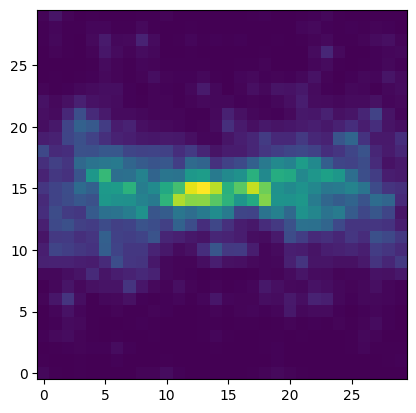

In [18]:
#NBVAL_SKIP
import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 14,
        "reuse": True,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 10000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-14.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "NIRSpec_G235H_F170LP",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
    },        
}

pipe = RubixPipeline(config)

data= pipe.run()

datacube = data["datacube"]
img = datacube.sum(axis=2)
plt.imshow(img, origin="lower")